In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
cn = sqlite3.connect('../laliga.sqlite')
df = pd.read_sql_query("SELECT * FROM Matches", cn)
df_aux = df
df

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2
...,...,...,...,...,...,...,...,...
49015,2021-2022,2,42,5/29/22,None,Real Oviedo,UD Ibiza,None
49016,2021-2022,2,42,5/29/22,None,Real Sociedad B,Real Zaragoza,None
49017,2021-2022,2,42,5/29/22,None,Sporting Gijón,UD Las Palmas,None
49018,2021-2022,2,42,5/29/22,None,CD Tenerife,FC Cartagena,None


In [3]:
# Which teams
df_teams = df_aux['home_team'].drop_duplicates()
for team in df_teams:
    print(team)

Arenas Club
Espanyol
Real Madrid
Donostia
Racing
Barcelona
Athletic
Athletic Madrid
Real Unión
Catalunya
Alavés
Valencia
Real Betis
Real Oviedo
Sevilla FC
Hércules CF
CA Osasuna
Real Zaragoza
Celta de Vigo
Ath. Aviación
Real Murcia
Atl. Aviación
Granada CF
Dep. La Coruña
Real Sociedad
CD Castellón
CE Sabadell 
Real Gijón
CD Alcoyano
Gimnàstic
Atlético Madrid
Real Valladolid
CD Málaga
Lérida
Atlético Tetuán
UD Las Palmas
Real Jaén CF
CyD Leonesa
CD Condal
Elche CF
RCD Mallorca
CD Tenerife
Córdoba CF
Pontevedra
Levante
Sporting Gijón
Burgos CF
UD Salamanca
Cádiz CF
Rayo Vallecano
Recr. Huelva
AD Almería
CD Logroñés
Albacete
UE Lleida
SD Compostela
CP Mérida
CF Extremadura
Villarreal
Málaga CF
CD Numancia
Getafe
UD Almería
Xerez CD
SD Eibar
CD Leganés
Girona
SD Huesca
Baracaldo
Ferrol
Avilés Ind.
SD Ceuta
CE Constància
Córdoba
Mestalla
CF Badalona
Orensana
SG Lucense
SD Erandio Club
Arosa SC
Gimnástica
Caudal
Tarrasa
Indauchu
La Felguera
Sestao Sport
CD Basconia
Orense
UP Langreo
Atl. Bal

### Is it true that the home team is more likely to win? Make a pie chart showing the result distribution (whether home team wins, visitor team wins, or there’s a tie) of all matches in the data. Write in the plot the percentage of each category


In [4]:
def parse_score(score):
    """ 
        This function tells who won as a function of the score.
    """
    w = ''
    if score:
        score = score.split(':')
        if score[0] > score[1]:
            w = 'Home team wins'
        elif score[0] < score[1]:
            w = 'Visitor team wins'
        elif score[0] == score[1]:
            w = 'Tie'
    else:
        w = 'Unknown'
    return w

In [5]:
scores = df_aux['score'].values
scores = [x.split(':') if x else [-1, -1] for x in scores]

# New column with the winning team
df_aux['Win'] = df_aux['score'].apply(parse_score)

print(df_aux['Win'].value_counts())

Home team wins       25457
Tie                  12341
Visitor team wins    10442
Unknown                780
Name: Win, dtype: int64


<AxesSubplot:title={'center':'Result distribution'}>

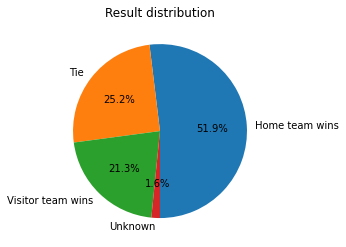

In [6]:
df_aux['Win'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=270, fontsize=10, ylabel='', title='Result distribution')

### What are the top ten scoring teams of all time? What are the ten teams that concede the most? Make two bar plot charts showing each of them. Consider only matches played in 1st division. What have been the biggest wins? Of course, when we say biggest we mean those with the highest goal difference. Show the top ten of them in a table.


,season,division,matchday,date,time,home_team,away_team,score,Win,home_goals,away_goals,goal_difference
225,1930-1931,1,10,2/8/31,None,Athletic,Barcelona,12:1,Home team wins,12.0,1.0,11.0
936,1940-1941,1,1,9/29/40,None,Sevilla FC,Barcelona,11:1,Home team wins,11.0,1.0,10.0
1071,1941-1942,1,1,9/28/41,None,Sevilla FC,Real Oviedo,10:0,Home team wins,10.0,0.0,10.0
1168,1941-1942,1,15,1/11/42,None,Athletic,Celta de Vigo,10:0,Home team wins,10.0,0.0,10.0
2787,1950-1951,1,11,11/19/50,None,Athletic,Lérida,10:0,Home team wins,10.0,0.0,10.0
6,1928-1929,1,2,2/17/29,None,Athletic,Espanyol,9:0,Home team wins,9.0,0.0,9.0
408,1932-1933,1,10,1/29/33,None,Racing,Alavés,9:0,Home team wins,9.0,0.0,9.0
516,1933-1934,1,14,2/4/34,None,Athletic,Arenas Club,9:0,Home team wins,9.0,0.0,9.0
2537,1949-1950,1,2,9/11/49,None,Barcelona,Gimnàstic,10:1,Home team wins,10.0,1.0,9.0
2574,1949-1950,1,8,10/23/49,None,Celta de Vigo,Gimnàstic,10:1,Home team wins,10.0,1.0,9.0


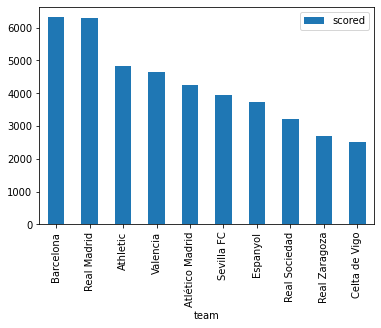

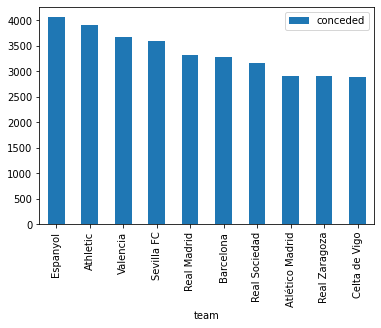

In [7]:
N = 10 #number of maximum values wanted

df_aux = df
scores = df_aux['score'].values
scores = [x.split(':') if x else [None, None] for x in scores]

# define new columns with Goals for each team
home_goals = []
away_goals = []
for scored_goals in scores:
    home_goals.append(scored_goals[0])
    away_goals.append(scored_goals[1])
df_aux['home_goals'] = pd.to_numeric(home_goals)
df_aux['away_goals'] = pd.to_numeric(away_goals)

# Search for goals scored and recieved in all history
df_first_division = df_aux[df_aux['division'] == 1]
df_team_home = df_first_division.groupby('home_team').agg({'home_goals' : sum,'away_goals' : sum}).rename({"home_goals":"scored", "away_goals":"conceded"},axis = 'columns')
df_team_away = df_first_division.groupby('away_team').agg({'home_goals' : sum,'away_goals' : sum}).rename({"home_goals":"conceded", "away_goals":"scored"},axis = 'columns')
df_team_home = df_team_home.rename_axis('team')
df_team_away = df_team_away.rename_axis('team')
df_team = pd.concat([df_team_home, df_team_away],axis=0)
df_team = df_team.groupby('team').sum().reset_index()

#Maximum N scored and conceded
df_team.nlargest(N,'scored',"all").plot.bar(x='team', y='scored')
df_team.nlargest(N,'conceded',"all").plot.bar(x='team', y='conceded')

#Biggest history wins
df_first_division['goal_difference'] = abs(df_first_division['home_goals'] - df_first_division['away_goals'])
df_top_wins = df_first_division.nlargest(N,'goal_difference',"all")
df_top_wins

### There has been a lot of discussion about how LaLiga’s television rights have changed game schedules in the last years. Make a bar plot chart showing the number of matches played each weekday, and make also a histogram of match time. Compare this two graphics between seasons 2000-2001 and 2020-2021.

In [8]:
def year_reformat (year):
    """ 
        This function changes the year format.
    """
    if (int(year) <= 22): 
        year = int('20'+year)
    else:
        year = int('19'+year)
    return year

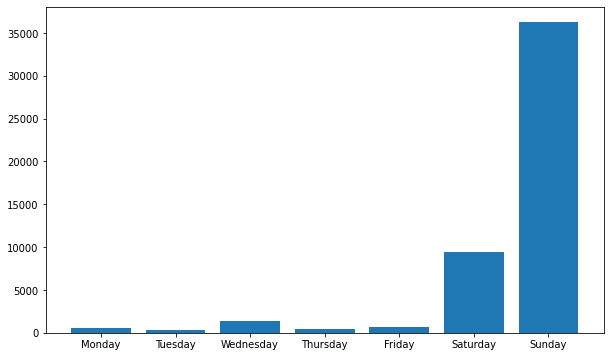

In [9]:
# Saving days of week 0=Monday to 6=sunday
dates = df_aux['date'].values
dates = [date.split('/') if date else [None, None, None] for date in dates]
match_weekday = []
for match in range(len(dates)):
    dates[match][2] = year_reformat(dates[match][2])
    date_formated = datetime.datetime(int(dates[match][2]),int(dates[match][0]),int(dates[match][1]))
    match_weekday.append(date_formated.weekday())
df_aux['weekday'] = match_weekday

#Ploting
labels,count = np.unique(df_aux['weekday'], return_counts=True)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
plt.bar(labels,count,align='center')
plt.gca().set_xticks(labels)
plt.show()

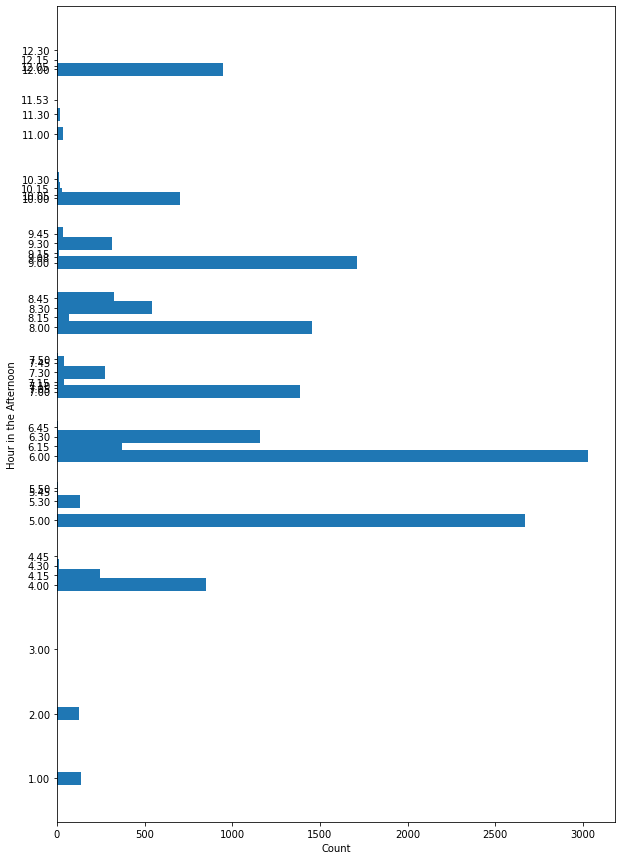

In [10]:
#converting time
df_time = df_aux[['time']]
df_time = df_time[df_time['time'].notnull()]
df_time['time'] = df_time['time'].str.split(' ')
df_time[['hour','midday']] = pd.DataFrame(df_time.time.tolist(), index = df_time.index)
df_time['hour'] = df_time['hour'].str.split(':')
df_time[['hour','min']] = pd.DataFrame(df_time.hour.tolist(), index = df_time.index)
df_time = df_time.sort_values(by = ['hour', 'min'], ascending = True)
df_time['time'] = df_time[['hour', 'min']].agg('.'.join,axis=1)
df_time['time'] = pd.to_numeric(df_time['time'], downcast="float")
df_time

#plot
labels,count = np.unique(df_time['time'], return_counts=True)
plt.figure(figsize=(10, 15))
plt.barh(labels,count,align='center', height=0.2)
plt.gca().set_yticks(labels)
plt.xlabel('Count')
plt.ylabel('Hour in the Afternoon')
plt.show()

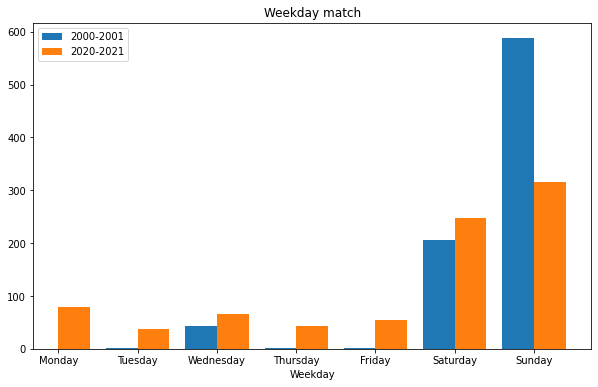

In [11]:
#comparison of days of match between 2000-2001 and 2020-2021
season_2000_2001_weekdays = []
season_2020_2021_weekdays = []
for match in range(len(df_aux['season'])):
    if df_aux['season'][match] == '2000-2001':
        season_2000_2001_weekdays.append(df_aux['weekday'][match])
    elif df_aux['season'][match] == '2020-2021':
        season_2020_2021_weekdays.append(df_aux['weekday'][match])
labels,count = np.unique(season_2000_2001_weekdays, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(labels-0.2,count,width=0.4,align='center',label="2000-2001")
labels2 = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

labels,count = np.unique(season_2020_2021_weekdays, return_counts=True)
ax = plt.gca()
ax.set_xticklabels(labels2)
plt.bar(labels+0.2,count,width=0.4,align='center',label="2020-2021")

plt.xlabel("Weekday")
plt.legend()
plt.title("Weekday match")
plt.show()

### Build a cross results table for season 2020-2021. Figure 1 is an example taken fromWikipedia. Try to make it the most similar to this one: use team abbreviations as column names and paint the background of each cell according to result (green in case local team wins and red in case visitor team wins). Also, could you model the intensity of this background color with the goal difference from the match?

In [12]:
def background_color(column, maxDiff):
    """
        This function determines the color of each cell as function of 
        the goal difference.
    """
    row_color=[]
    for row in column:
        if row != '---':
            row = row.split('-')
            diff = abs(int(row[0])- int(row[1]))
            if row[0] > row[1]:
                color = f'background-color: rgba(0,255,0, {diff/maxDiff});'
            elif row[0] < row[1]:
                color = f'background-color: rgba(255,0,0, {diff/maxDiff}); '
            elif row[0] == row[1]:
                color = f'background-color: rgba(255, 255, 0, 0.6);'
        else:
            color = 'background-color: white; opacity: 0.8'
        row_color.append(color)
    return row_color

def max_diff(df):
    """
        This function returns the maximum difference of goals.
    """
    res = []
    for column in df:
        res.extend(df[column][1:])
        
    res = [abs(int(x.split('-')[0]) - int(x.split('-')[1])) for x in res if x != '---']
    return max(res)

def plot_cross_results_table(season,division):
    """
        This function creates a table of match results of first division of a certain 
        season and division
    """
    df_season = df_aux[(df_aux['season'] == season) & (df_aux['division'] == division)]
    team_name = df_season['home_team'].drop_duplicates().to_numpy()
    score_table = []
    for local_name in team_name:
        score = []
        for away_name in team_name:
            df_match_score = df_season[(df_season['home_team'] == local_name) &
                                       (df_season['away_team'] == away_name)]
            score_array = (df_match_score['score'].str.replace(':','-')).to_numpy()
            result = df_match_score['Win'].to_numpy()
            if score_array.size > 0 :
                score.append(score_array[0])
            if local_name == away_name:
                score.append('---') 
        score_table.append(score)
    df_season_table = pd.DataFrame(score_table,
                                  index = pd.Index(team_name),
                                  columns = pd.Index(team_name,name='Local & Visitant'))
    max_difference = max_diff(df_season_table)
    formated = df_season_table.style.apply(background_color, args=(max_difference,)
                                          ).set_properties(**{'color': 'black','text-align': 'center', })
    return formated

In [13]:
season = '2020-2021'
plot_cross_results_table(season,1)

Local & Visitant,SD Eibar,Granada CF,Cádiz CF,Alavés,Real Valladolid,Villarreal,Valencia,Atlético Madrid,Real Madrid,Barcelona,Getafe,Celta de Vigo,SD Huesca,Real Betis,Real Sociedad,Athletic,Levante,Sevilla FC,Elche CF,CA Osasuna
SD Eibar,---,2-0,0-2,3-0,1-1,1-3,0-0,1-2,1-3,0-1,0-0,0-0,1-1,1-1,0-1,1-2,0-1,0-2,0-1,0-0
Granada CF,4-1,---,0-1,2-1,1-3,0-3,2-1,1-2,1-4,0-4,0-0,0-0,3-3,2-0,1-0,2-0,1-1,1-0,2-1,2-0
Cádiz CF,1-0,1-1,---,3-1,0-0,0-0,2-1,2-4,0-3,2-1,0-2,0-0,2-1,0-1,0-1,0-4,2-2,1-3,1-3,0-2
Alavés,2-1,4-2,1-1,---,1-0,2-1,2-2,1-2,1-4,1-1,0-0,1-3,1-0,0-1,0-0,1-0,2-2,1-2,0-2,0-1
Real Valladolid,1-2,1-2,1-1,0-2,---,0-2,0-1,1-2,0-1,0-3,2-1,1-1,1-3,1-1,1-1,2-1,1-1,1-1,2-2,3-2
Villarreal,2-1,2-2,2-1,3-1,2-0,---,2-1,0-2,1-1,1-2,1-0,2-4,1-1,1-2,1-1,1-1,2-1,4-0,0-0,1-2
Valencia,4-1,2-1,1-1,1-1,3-0,2-1,---,0-1,4-1,2-3,2-2,2-0,1-1,0-2,2-2,2-2,4-2,0-1,1-0,1-1
Atlético Madrid,5-0,6-1,4-0,1-0,2-0,0-0,3-1,---,1-1,1-0,1-0,2-2,2-0,2-0,2-1,2-1,0-2,2-0,3-1,2-1
Real Madrid,2-0,2-0,0-1,1-2,1-0,2-1,2-0,2-0,---,2-1,2-0,2-0,4-1,0-0,1-1,3-1,1-2,2-2,2-1,2-0
Barcelona,1-1,1-2,1-1,5-1,1-0,4-0,2-2,0-0,1-3,---,5-2,1-2,4-1,5-2,2-1,2-1,1-0,1-1,3-0,4-0


### As you surely know, there has always been a historical rivalry between Barcelona and Real Madrid. But which of them has won the most games in direct confrontations? Which of them has scored the most goals in these games? Show both things in two pie charts, side by side. Remember to consider ties in the first one.
### Write a function that, given two team names, plots the two graphs described above. Function prototype should be like plot_direct_confrontations_stats(team1, team2) and return the plot object. Use it with some other classical rivals like Betis and Sevilla.


In [14]:
def plot_direct_confrontations_stats(team1, team2):
    """
        This function computes and plots in a pie chart, all the results of 
        team1 vs team2 confrontations and the percentatge of total scores.
    """
    
    fig = plt.figure(figsize=(10,5))
    
    df_home = df.loc[(df['home_team'] == team1) & (df['away_team'] == team2)]
    df_away_reverse = df.loc[(df['home_team'] == team2) & (df['away_team'] == team1)]
    temp = df_away_reverse['home_team']
    df_away_reverse['home_team'] = df_away_reverse['away_team']
    df_away_reverse['away_team'] = temp
    df_confront = pd.concat([df_home, df_away_reverse])
    
    # Plot wins
    ax = plt.subplot(121)
    plt.title("Wins")
    confront_counts = df_confront['Win'].value_counts()
    confront_counts.index = [team1, team2, 'Tie', 'Unknown']
    plt.pie(confront_counts, labels=confront_counts.index, autopct='%1.1f%%')
    
    # Plot goals
    ax = plt.subplot(122)
    plt.title("Goals")
    team1_goals = np.nansum(df_confront['home_goals'].to_numpy())
    team2_goals = np.nansum(df_confront['away_goals'].to_numpy())
    goal_count = pd.Series([team1_goals, team2_goals], index=[team1 , team2])

    plt.pie(goal_count, labels=goal_count.index, autopct='%.2f%%')
    plt.close()
    fig.tight_layout(pad=3.0)
    
    return fig

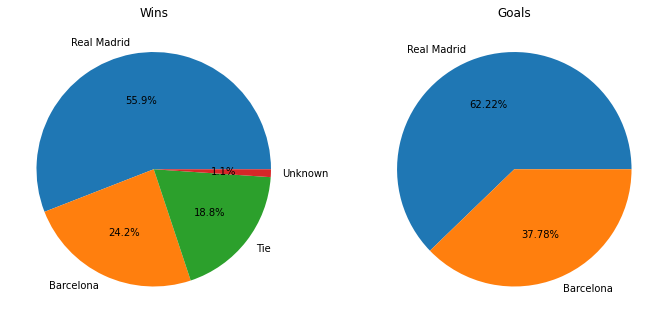

In [15]:
plot_direct_confrontations_stats('Real Madrid', 'Barcelona')

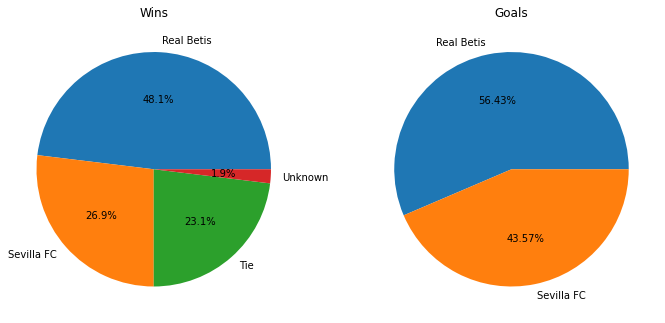

In [16]:
plot_direct_confrontations_stats('Real Betis', 'Sevilla FC')

### Between 1979 and 1980, Real Sociedad managed to chain a total of 38 games without losing. That was, by far, the longest undefeated streak in their history. Which teams have had the longest undefeated streaks? Show the longest undefeated streaks in a horizontal bar plot, indicating in each bar the team name and the dates it held that streak, for instance, Real Sociedad 22/04/1979 - 04/05/1980.

In [17]:
def counter_undefeated(team):
    """
        This function computes search for the maximum period of time the team has been
        undefeted and returns the number of matches and the operiod of time it happened.
    """
    
    df_team = df_aux[((df_aux['home_team'] == team) | (df_aux['away_team'] == team))]
    max_undefeat = 0
    count = 0
    period = None
    
    for match in range(len(df_team)):
        if (((df_team['home_team'].iloc[match] == team) & (df_team['Win'].iloc[match] == 'Home team wins')) | 
            ((df_team['away_team'].iloc[match] == team) & (df_team['Win'].iloc[match] == 'Visitor team wins')) |
            ((df_team['Win'].iloc[match] == 'Tie'))):
            if count == 0 :
                start_date = df_team['date'].iloc[match]
            count = count + 1
            
        else:
            if count > max_undefeat:
                max_undefeat = count
                end_date = df_team['date'].iloc[match-1]
                period = str(start_date)+' - '+str(end_date)
            count = 0
            
    return max_undefeat, period
        

<AxesSubplot:title={'center':'Longest undefeated streaks'}, ylabel='team and date'>

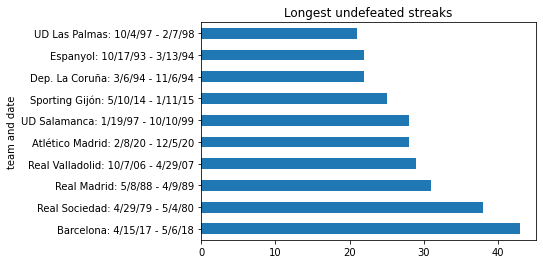

In [18]:
#Searching for longer udefeatments
data = []

for team in df_teams:
    undefeated, dates = counter_undefeated(team)
    data.append([str(team)+': '+str(dates), undefeated])
    
df_undefeatment = pd.DataFrame(data,columns=['team_name_and_date', 'undefeated_matches'])
df_undefeatment = df_undefeatment.sort_values('undefeated_matches',ascending=False).head(10)
                                              
#horizontal bar plot
df_undefeatment.plot(kind='barh', x='team_name_and_date', y='undefeated_matches',
                     title ='Longest undefeated streaks', xlabel= 'team and date', 
                     ylabel='undefeated matches', legend=False)

### Create a table with the final standings of each season (and division), that is, a table that contains all the teams ordered (in descending order) by the number of points they got during that season, and some other aggregate statistics. The table must contain the following columns: season, division, ranking, team, GF (total goals scored), GA (total goals conceded), GD (goals difference), W (total wins), L (total loses), T (total ties), Pts (points). Remember that, in football, you earn 3 points per victory, and 1 point per tie (none for loses). In case two teams have same number of points, order by GD (descending), and then by GF (also descending). Order the table so that standings of one season come before standings of previous one, and standings of 1st division come before standings of 2nd division.
### Save the final table in Excel with the name SeasonStandings.xlsx in the reports/ folder.

In [19]:
def statistics_season_division(season,division,df_season_division):
    """
        This function computes the statisitcs of a certain season and division
        and returns the results at the end of the season.
    """
    teams = df_season_division['home_team'].drop_duplicates()
    # Initiallizing arrays of results
    teams_win_count = []
    teams_draw_count = []
    teams_lose_count = []
    teams_scored_goals = []
    teams_conceded_goals = []
    teams_pts = []
    seasons = []
    divisions = []
    teams_goal_difference = []
    
    for team in teams:
        win_count = 0
        draw_count = 0 
        lose_count = 0
        scored_goals = 0
        conceded_goals = 0
        
        for match in range(len(df_season_division)):
            
            if (df_season_division['home_team'].iloc[match] == team):
                scored_goals += int(df_season_division['home_goals'].iloc[match])
                conceded_goals += int(df_season_division['away_goals'].iloc[match])
                
                if (df_season_division['Win'].iloc[match] == 'Home team wins'):
                    win_count += 1
                    
                elif (df_season_division['Win'].iloc[match] == 'Tie'):
                    draw_count += 1
                    
                else:
                    lose_count += 1
                    
            elif (df_season_division['away_team'].iloc[match] == team):
                scored_goals += int(df_season_division['away_goals'].iloc[match])
                conceded_goals += int(df_season_division['home_goals'].iloc[match])
                
                if (df_season_division['Win'].iloc[match] == 'Visitor team wins'):
                    win_count += 1
                    
                elif (df_season_division['Win'].iloc[match] == 'Tie'):
                    draw_count += 1
                    
                else:
                    lose_count +=1
        
        # Appending statusthics 
        teams_win_count.append(int(win_count))
        teams_draw_count.append(int(draw_count))
        teams_lose_count.append(int(lose_count))
        teams_scored_goals.append(int(scored_goals))
        teams_conceded_goals.append(int(conceded_goals))
        points = int(win_count*3 + draw_count)
        teams_pts.append(points)
        goal_dif = int(scored_goals-conceded_goals)
        teams_goal_difference.append(goal_dif)
        seasons.append(season)
        divisions.append(division)
    
    # Creating a data set with all statisthics
    data = {'season' : seasons,
           'division' : divisions,
           'team' : teams,
           'GF' : teams_scored_goals,
           'GA' : teams_conceded_goals,
           'GD' : teams_goal_difference,
           'W' : teams_win_count,
           'L' : teams_lose_count,
           'T' : teams_draw_count,
           'Pts': teams_pts}
    
    return data

In [20]:
def season_division_element(season, division):
    """
        This function returns a dataframe with the statistics of
        a certani season and division.
    """
    
    df_season_division = df_season[df_aux['division'] == division]
    data = statistics_season_division(season,division,df_season_division)
    df_statistics = pd.DataFrame(data = data)
    df_statistics = df_statistics.sort_values(by=['Pts'], ascending=False)
    position = []
    for i in range(len(df_statistics)):
        position.append(i+1)
    df_statistics['ranking'] = position
    
    return df_statistics

In [21]:
# Creating a list of seasons
seasons = []
for i in range(2020-1928+1):
    year = 2020 - i
    year2 = 2021 - i
    seasons.append(str(str(year)+'-'+str(year2)))

#computing for each season
for season in seasons:
    
    df_season = df_aux[df_aux['season'] == season]
    second_division = 1
    
    # Considering the seasons with only first division
    if season == '1931-1932':
        second_division = 0
    
    # Season with both divisions
    if second_division == 1:
        
        for division in [1,2]:
            
            # First element of the dataframe
            if ((season == '2020-2021') & (division == 1)):
                df_statistics = season_division_element(season,division)
                df_final_statistics = df_statistics
            
            # Other elements that concatenate in descending order of season and division.
            else:
                df_statistics = season_division_element(season,division)
                df_final_statistics = pd.concat([df_final_statistics,df_statistics])
                
    # Season with only one division
    elif second_division == 0:
        df_statisitics = season_division_element(season,division)
        df_final_statistics = pd.concat([df_final_statistics,df_statistics])
        
print(df_final_statistics.head())

#Saving in file
df_final_statistics.to_excel("../reports/SeasonStandings.xlsx")

          season  division             team    GF    GA    GD     W     L  \
25685  2020-2021       1.0  Atlético Madrid  67.0  25.0  42.0  26.0   4.0   
25686  2020-2021       1.0      Real Madrid  67.0  28.0  39.0  25.0   4.0   
25687  2020-2021       1.0        Barcelona  85.0  38.0  47.0  24.0   7.0   
25697  2020-2021       1.0       Sevilla FC  53.0  33.0  20.0  24.0   9.0   
25694  2020-2021       1.0    Real Sociedad  59.0  38.0  21.0  17.0  10.0   

          T   Pts  ranking  
25685   8.0  86.0      1.0  
25686   9.0  84.0      2.0  
25687   7.0  79.0      3.0  
25697   5.0  77.0      4.0  
25694  11.0  62.0      5.0  


## Villarreal is a team that has grown a lot in recent decades. Specially ever since some billionaire guy bought it (Fernando Roig, from Mercadona). Make a line plot showing the rank of Villarreal at the end of each season, from the oldest ones (left) to the earliest ones (right). Consider rankings in 2nd division to be a continuation of the 1st one, that is, if there’s N teams in 1st division and Villarreal got r position in 2nd division, then it should be placed in N + r. Draw in the same plot a line showing the cut between 1st and 2nd division.  

   Unnamed: 0     season  division             team  GF  GA  GD   W   L   T  \
0       25685  2020-2021         1  Atlético Madrid  67  25  42  26   4   8   
1       25686  2020-2021         1      Real Madrid  67  28  39  25   4   9   
2       25687  2020-2021         1        Barcelona  85  38  47  24   7   7   
3       25697  2020-2021         1       Sevilla FC  53  33  20  24   9   5   
4       25694  2020-2021         1    Real Sociedad  59  38  21  17  10  11   

   Pts  ranking  
0   86        1  
1   84        2  
2   79        3  
3   77        4  
4   62        5  


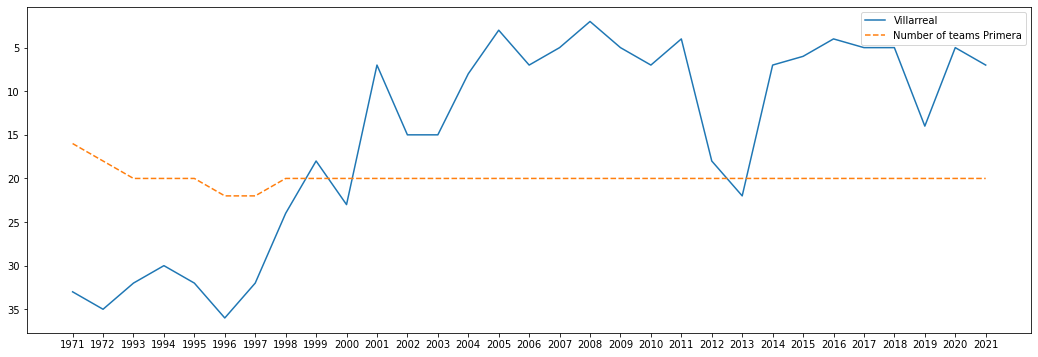

In [22]:
# Open file 
df = pd.read_excel("../reports/SeasonStandings.xlsx", engine='openpyxl')
print(df.head())

# Looking for specific team Villareal
df_villarreal = df.loc[df['team'] == 'Villarreal']

# Saving rank for each season
x = []
y = []
number_teams_l = []

for index, row in df_villarreal.iterrows():
    x.append(row['season'].split('-')[1])
    sumPos = 0
    # Number of teams in primera that year
    df_season = df.loc[df['season'] == row['season']]
    df_season = df_season.loc[df['division'] == 1]
    number_teams = df_season.shape[0]
    number_teams_l.append(number_teams)
    if row['division'] == 2:
        sumPos = number_teams
    y.append(row['ranking'] + sumPos)

# Reversing order of data to plot in ascending time
x.reverse()
y.reverse()
number_teams_l.reverse()

#Plotting figure
plt.figure(figsize=(18, 6))
plt.gca().invert_yaxis()
plt.plot(x, y, label='Villarreal')
plt.plot(x, number_teams_l, '--', label='Number of teams Primera')
plt.legend()

## Write a function that, given n team names, plots the graph described above of each one of them superposed. Function prototype should be like plot_ranking_evolution(team1, team2, ..., teamN) and return the plot object (note that function should not take one array-type argument, but n arguments). Use it to compare the evolution of all Catalan teams in the data.


In [23]:
def plot_ranking_evolution(*args):
    """
        This function plots given as arguments N teams, the ranking history of
        each time for each season.
    """
    
    plt.figure(figsize=(48, 6))
    plt.gca().invert_yaxis()
    
    seasons = df['season'].unique()  
    seasons = seasons[::-1]
    
    plots = {}
    number_teams_l = []
    
    for season in seasons: 
        df_season = df.loc[df['season'] == season]
        primera_teams = df_season.loc[df['division'] == 1]
        primera_teams = primera_teams.shape[0]
        number_teams_l.append(primera_teams)
        
        for arg in args:
            
            if arg in df_season['team'].values:
                df_team = df_season.loc[df_season['team'] == arg]
                
                if not arg in plots:
                    plots[arg] = []
                sum_pos = 0
                
                if df_team['division'].values[0] == 2:
                    sum_pos += primera_teams
                    
                plots[arg].append(df_team['ranking'].values[0] + sum_pos)
                
            else:      
                if not arg in plots:
                    plots[arg] = [] 
                plots[arg].append(None)
                
    seasons = [x.split('-')[1] for x in seasons]
            
    for arg in args:
        plt.plot(seasons, plots[arg], label=arg)
    plt.plot(seasons, number_teams_l, '--', label='Number of teams primera')
    plt.legend()

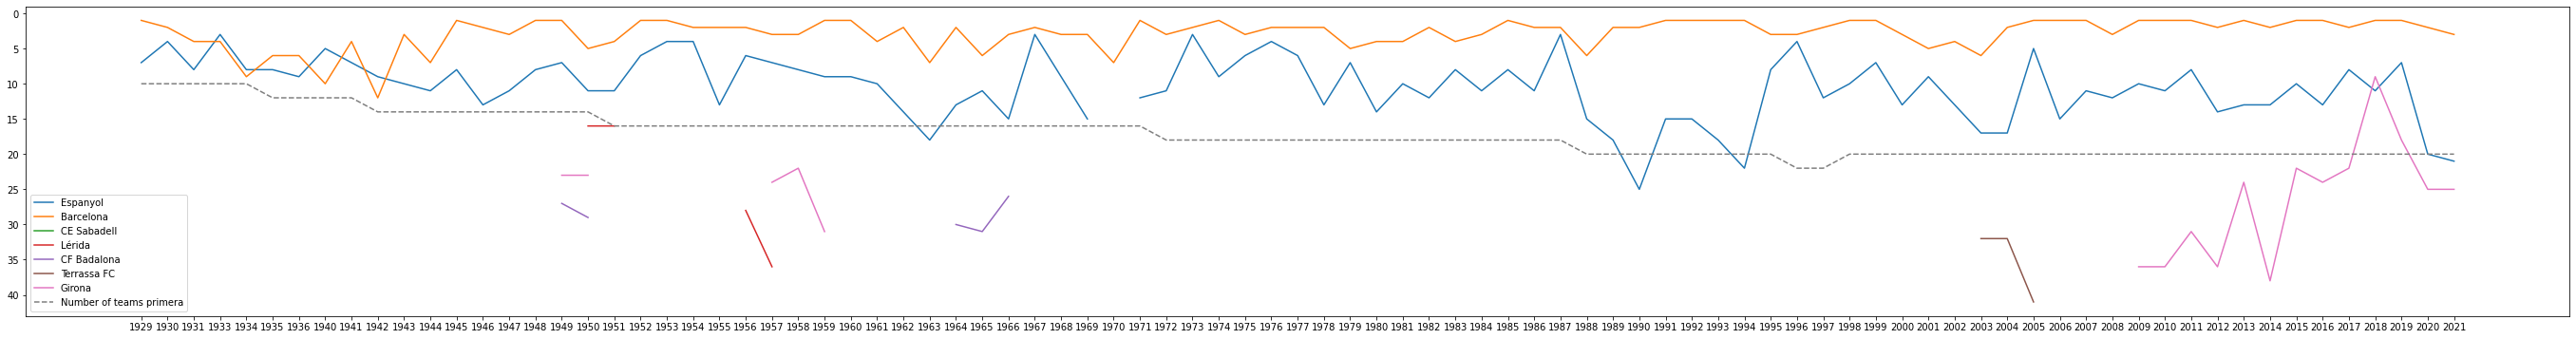

In [24]:
plot_ranking_evolution('Espanyol', 'Barcelona', 'CE Sabadell', 'Lérida', 'CF Badalona', 'Terrassa FC', 'Girona')

In [25]:
df_current_teams_1st = df_aux[(df_aux['season'] == '2020-2021') & (df_aux['division'] == 1)]
current_teams_1st = df_current_teams_1st['home_team'].drop_duplicates()
print(current_teams_1st.values)

['SD Eibar' 'Granada CF' 'Cádiz CF' 'Alavés' 'Real Valladolid'
 'Villarreal' 'Valencia' 'Atlético Madrid' 'Real Madrid' 'Barcelona'
 'Getafe' 'Celta de Vigo' 'SD Huesca' 'Real Betis' 'Real Sociedad'
 'Athletic' 'Levante' 'Sevilla FC' 'Elche CF' 'CA Osasuna']


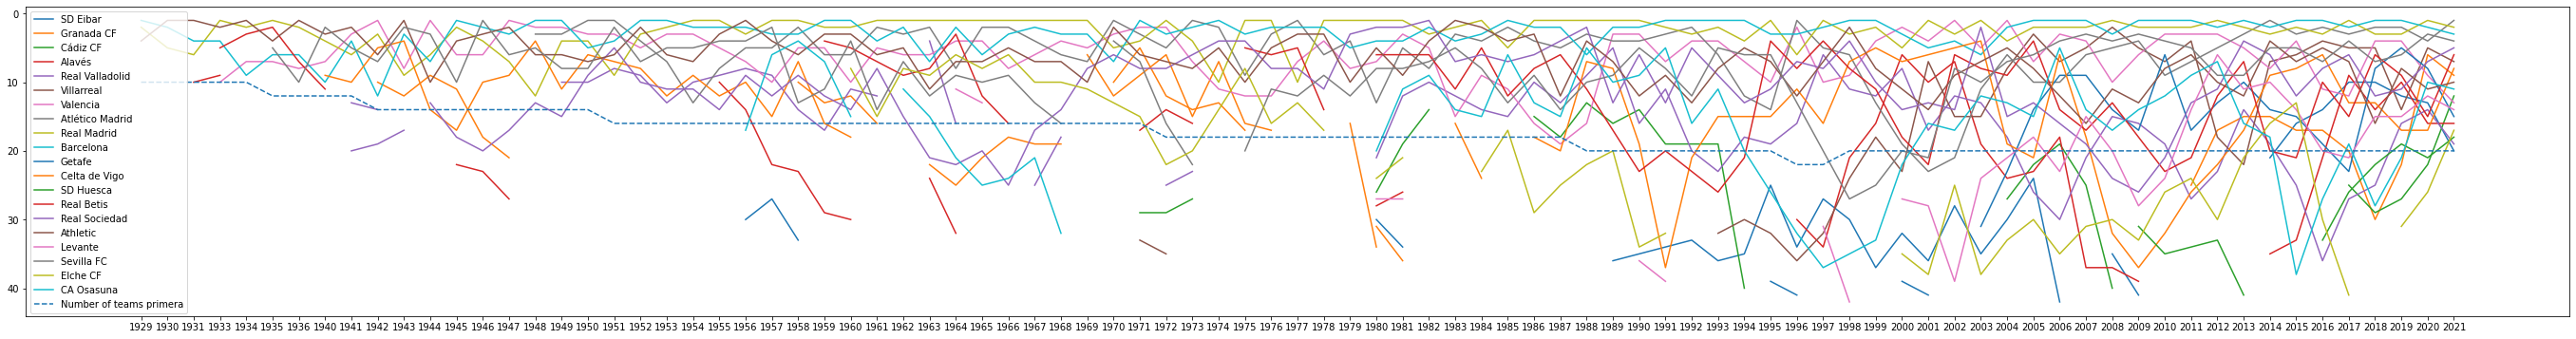

In [26]:
plot_ranking_evolution('SD Eibar', 'Granada CF', 'Cádiz CF', 'Alavés', 'Real Valladolid',
 'Villarreal', 'Valencia', 'Atlético Madrid', 'Real Madrid', 'Barcelona',
 'Getafe', 'Celta de Vigo', 'SD Huesca', 'Real Betis', 'Real Sociedad',
 'Athletic', 'Levante', 'Sevilla FC', 'Elche CF', 'CA Osasuna')

## In football jargon, those teams that are permanently descending and ascending between 1st and 2nd division are called elevator teams. What are the most elevator teams in LaLiga? Plot the history of the top 5 of them using the function from exercise 9.

Dep. La Coruña
 Celta de Vigo
        Racing
Rayo Vallecano
    Real Betis


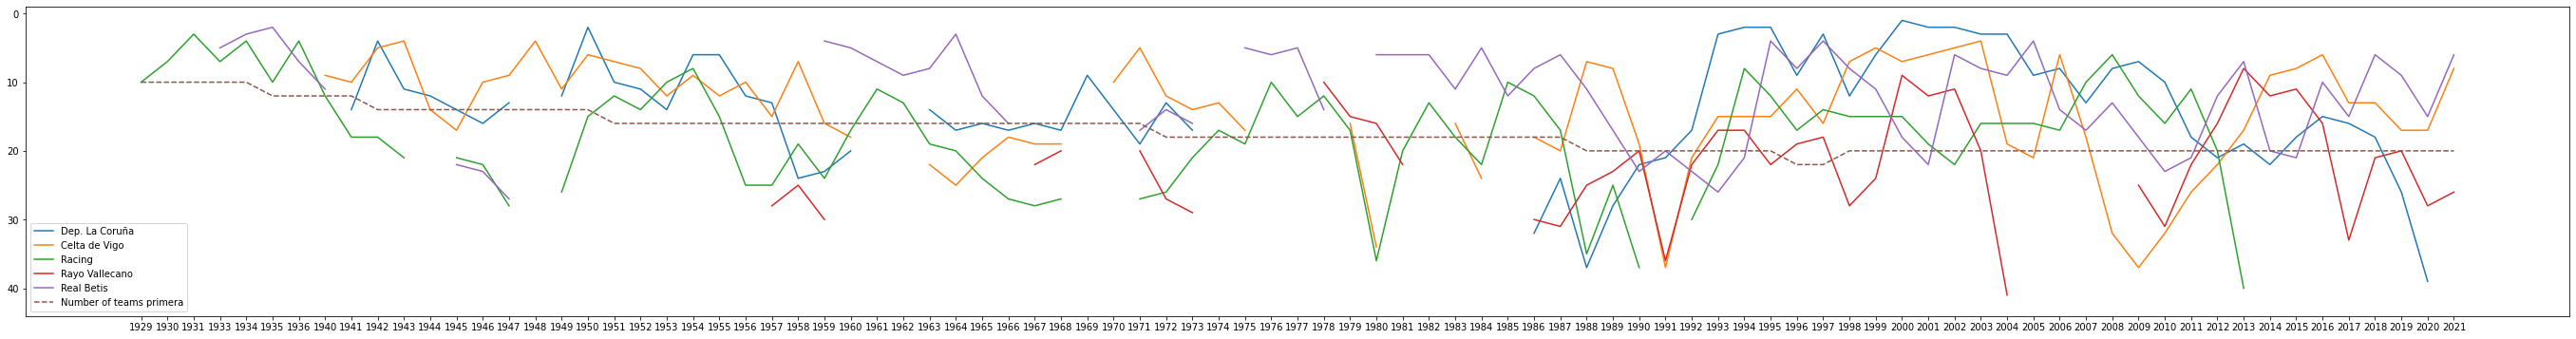

In [27]:
df = pd.read_excel("../reports/SeasonStandings.xlsx", engine='openpyxl')

# Dataframe to save changes of division
data = {'teams': df.team.unique(),
        'changes_division': df.team.unique()}
df_elevator = pd.DataFrame(data)

#counting number of changes of division
for index, row in df_elevator.iterrows():
    df_team = df.loc[df['team'] == row['teams']]
    dif = df_team['division'].diff()
    df_division = df_team[(np.isnan(dif) != True) & (dif != 0.0)]  
    row['changes_division'] =len(df_division)

#top 5 elevator teams    
top5 = (df_elevator.sort_values(['changes_division'],ascending=False)).head(5)

#plot_ranking_evolution(top5['teams'].to_string(index=False))
plot_ranking_evolution('Dep. La Coruña', 'Celta de Vigo', 'Racing', 'Rayo Vallecano', 'Real Betis')
print(top5['teams'].to_string(index=False))

## Create a table that is the same as the one in exercise 7, but not only with the season final standings, but the standings at the end of each matchday. Columns are the same, including matchday that tells about which matchday from the season these standings are from. Would you be able to add a new column last_5 with the result of last 5 matches? This column should contain a list like ["W", "L", "W", "T", "T"]. In this list, the first item is the immediate previous match, the second one is the match before this one, and so on. If there are no 5 previous matches (because matchday < 6, for instance) then just make the list shorter. Save the final table in Excel with the name MatchdayStandings.xlsx in the reports/ folder.

In [28]:
# Constructing seasons 
seasons = []
for i in range(2020-1928+1):
    year = 2020 - i
    year2 = 2021 - i
    seasons.append(str(str(year)+'-'+str(year2)))

# Initiallizing dataframe
df_stats = pd.DataFrame([], columns=['season', 'division', 'matchday', 
                                        'team', 'GF', 'GA', 'GD', 'W', 'L',
                                        'T', 'Pts','last_5','Rank'])

for season in seasons:
    df_season = df_aux[df_aux['season'] == season]
    print(season)
    
    for division in [1,2]:
        df_season_division = df_season[df_season['division'] == division]
        df_stats_division = pd.DataFrame(data, columns=['season', 'division', 'matchday', 
                                                        'team', 'GF', 'GA', 'GD', 'W', 'L',
                                                        'T', 'Pts','last_5'])
        
        for team in df_season_division['home_team'].drop_duplicates():
            
            # Initiallizing counters
            win_count = 0
            draw_count = 0 
            lose_count = 0
            scored_goals = 0
            conceded_goals = 0
            pts = 0
            last_5_matches = []
            
            for matchday in df_season_division['matchday'].drop_duplicates():
                df_matchday = df_season_division[df_season_division['matchday'] == matchday]
                data = []
                df_stats_matchday = pd.DataFrame(data, columns=['season', 'division', 'matchday', 
                                                                'team', 'GF', 'GA', 'GD', 'W', 'L',
                                                                'T', 'Pts','last_5'])
                # Computing the tesults of each match
                for match in range(len(df_matchday)):
                    
                    if (df_matchday['home_team'].iloc[match] == team):
                        scored_goals += int(df_matchday['home_goals'].iloc[match])
                        conceded_goals += int(df_matchday['away_goals'].iloc[match])
                        
                        if (df_matchday['Win'].iloc[match] == 'Home team wins'):
                            win_count += 1
                            pts += 3
                            last_5_matches.append('W')
                            
                        elif (df_matchday['Win'].iloc[match] == 'Tie'):
                            draw_count += 1
                            pts += 1
                            last_5_matches.append('T')
                            
                        else:
                            lose_count += 1 
                            last_5_matches.append('L')
                            
                    elif (df_matchday['away_team'].iloc[match] == team):
                        scored_goals += int(df_matchday['away_goals'].iloc[match])
                        conceded_goals += int(df_matchday['home_goals'].iloc[match])
                        
                        if (df_matchday['Win'].iloc[match] == 'Visitor team wins'):
                            win_count += 1
                            pts += 3
                            last_5_matches.append('W')
                            
                        elif (df_matchday['Win'].iloc[match] == 'Tie'):
                            draw_count += 1
                            pts += 1
                            last_5_matches.append('T')
                            
                        else:
                            lose_count += 1
                            last_5_matches.append('L')
                
                # Creating dataframe fot each match
                pd_match = pd.DataFrame({'season' : season,
                                         'division' : division, 
                                         'matchday': matchday, 
                                         'team' : team, 
                                         'GF' : scored_goals, 
                                         'GA' : conceded_goals,
                                         'GD' : (scored_goals-conceded_goals),
                                         'W' : win_count,
                                         'L' : lose_count,
                                         'T' : draw_count, 
                                         'Pts' : pts,
                                         'last_5' : str(last_5_matches[-5:])
                                        }, index = [1])
                
                # Concatenating each match to matchday on each division
                df_stats_matchday = pd.concat([df_stats_matchday,pd_match], ignore_index=True)
                df_stats_matchday = df_stats_matchday.sort_values(by=['Pts'], ascending=False)
                df_stats_division = pd.concat([df_stats_division, df_stats_matchday], ignore_index=True)
                
        # Ranking teams by points in each matchday, and concatenating in final dataframe by season      
        df_stats_division['Rank'] = df_stats_division.groupby(by=['matchday'])['Pts'].rank(ascending=False, method='min')
        df_stats_division = df_stats_division.sort_values(by=['matchday','Rank'], ascending = True)
        df_stats = pd.concat([df_stats, df_stats_division], ignore_index=False)

# Saving on xlsx file
df_stats.to_excel("../reports/MatchdayStandings.xlsx")

2020-2021
2019-2020
2018-2019
2017-2018
2016-2017
2015-2016
2014-2015
2013-2014
2012-2013
2011-2012
2010-2011
2009-2010
2008-2009
2007-2008
2006-2007
2005-2006
2004-2005
2003-2004
2002-2003
2001-2002
2000-2001
1999-2000
1998-1999
1997-1998
1996-1997
1995-1996
1994-1995
1993-1994
1992-1993
1991-1992
1990-1991
1989-1990
1988-1989
1987-1988
1986-1987
1985-1986
1984-1985
1983-1984
1982-1983
1981-1982
1980-1981
1979-1980
1978-1979
1977-1978
1976-1977
1975-1976
1974-1975
1973-1974
1972-1973
1971-1972
1970-1971
1969-1970
1968-1969
1967-1968
1966-1967
1965-1966
1964-1965
1963-1964
1962-1963
1961-1962
1960-1961
1959-1960
1958-1959
1957-1958
1956-1957
1955-1956
1954-1955
1953-1954
1952-1953
1951-1952
1950-1951
1949-1950
1948-1949
1947-1948
1946-1947
1945-1946
1944-1945
1943-1944
1942-1943
1941-1942
1940-1941
1939-1940
1938-1939
1937-1938
1936-1937
1935-1936
1934-1935
1933-1934
1932-1933
1931-1932
1930-1931
1929-1930
1928-1929
